I noticed that as it is right now - the segmentation works - but I need to make it robust to noise and things like interference. 

2020-03-10
--Thejasvi Beleyur

In [1]:
import datetime
import glob
import os
import sys 
sys.path.append('..\\measure_horseshoe_bat_calls\\')


In [2]:
from segment_horseshoebat_call import *
from measure_a_horseshoe_bat_call import *
from view_horseshoebat_call import *

In [3]:
%matplotlib notebook

In [4]:
real_data = glob.glob('real_data\\'+'*.WAV')
# load, and upsample all files to 500 kHZ
all_calls = {}
file_names = []

for each in real_data:
    file_name = os.path.split(each)[-1]
    audio, fs = sf.read(each)
    
    audio_upsampled = signal.resample(audio, audio.size*2)
    all_calls[file_name] = audio_upsampled
    file_names.append(file_name)

In [5]:
len(file_names)

70

In [6]:
fs_up = fs*2

In [7]:
interesting_file_indices = [15, 55, 65, 2, 12, 64,5, 65, 46, 7, 27, 8, 28, 29, 69]
for each in interesting_file_indices:
    print(file_names[each])

matching_annotaudio_Aditya_2018-08-17_34_133.WAV
matching_annotaudio_Aditya_2018-08-17_34_72.WAV
matching_annotaudio_Aditya_2018-08-17_56_58.WAV
matching_annotaudio_Aditya_2018-08-17_23_141.WAV
matching_annotaudio_Aditya_2018-08-17_34_12.WAV
matching_annotaudio_Aditya_2018-08-17_56_27.WAV
matching_annotaudio_Aditya_2018-08-17_23_196.WAV
matching_annotaudio_Aditya_2018-08-17_56_58.WAV
matching_annotaudio_Aditya_2018-08-17_34_52.WAV
matching_annotaudio_Aditya_2018-08-17_23_56.WAV
matching_annotaudio_Aditya_2018-08-17_34_170.WAV
matching_annotaudio_Aditya_2018-08-17_23_65.WAV
matching_annotaudio_Aditya_2018-08-17_34_171.WAV
matching_annotaudio_Aditya_2018-08-17_34_18.WAV
matching_annotaudio_Aditya_2018-08-17_56_91.WAV


<IPython.core.display.Javascript object>


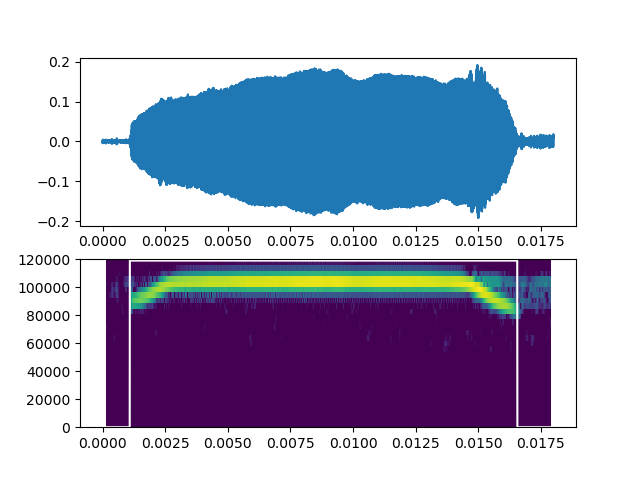

<IPython.core.display.Javascript object>


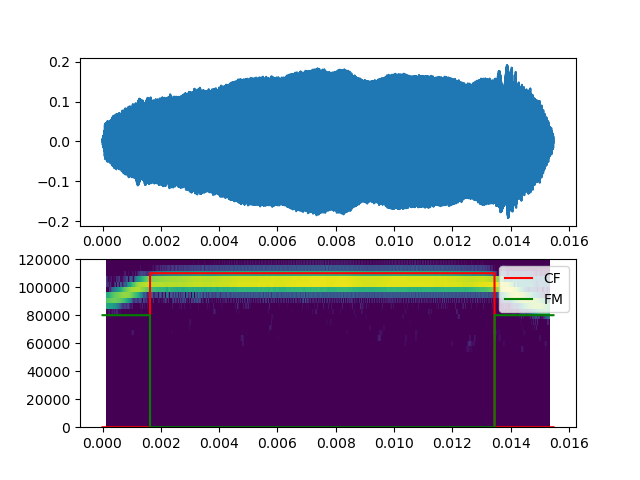

In [28]:
call_snippet = all_calls[file_names[25]]
main_threshold = -12
segment_call = segment_call_from_background(call_snippet, fs_up, background_threshold=main_threshold)
upper, lower = visualise_call(call_snippet, fs_up)
plt.plot(make_x_time(segment_call, fs_up), segment_call*119000,'w')
lower.set_ylim(0,120000)

main_call = call_snippet[segment_call]
cf, fm, info = segment_call_into_cf_fm(main_call, fs_up, peak_percentage=0.99)
upper, lower = visualise_call(main_call, fs_up)
lower.set_ylim(0,120000)
lower.plot(make_x_time(cf, fs_up), cf*110000,'r',label='CF')
lower.plot(make_x_time(fm, fs_up), fm*80000,'g',label='FM')
plt.legend()

halfway = int(call_snippet.size*0.5)

half1, half2 = call_snippet[:halfway], call_snippet[halfway:]
level_difference = dB(rms(half1)) - dB(rms(half2))
print(level_difference)
#main_threshold=-14
while True:
    try:
        print(main_threshold)
        segment1 = segment_call_from_background(half1, fs_up, background_threshold=main_threshold)
        segment2 = segment_call_from_background(half2, fs_up, background_threshold=main_threshold-level_difference)

        upper, lower = visualise_call(call_snippet, fs_up)
        plt.plot(make_x_time(segment_call, fs_up), np.concatenate((segment1, segment2))*120000,'r')
        break
    except:
        main_threshold += 1
        pass

<IPython.core.display.Javascript object>


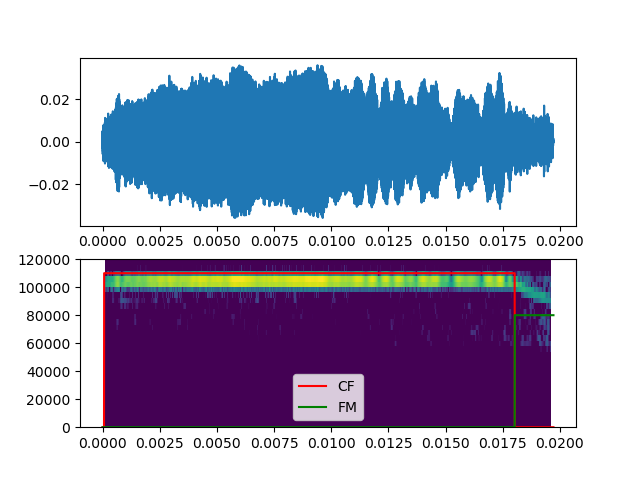

In [19]:
115000*(0.01)

1150.0